# Theme Analysis Notebook
This notebook demonstrates how to use **ThemeExtractor** from `theme_extractor.py` to:
- Load sentiment results
- Extract TF-IDF keywords
- Assign predefined themes
- Visualize keyword importance and theme distribution

Project root: c:\Users\Administrator\Desktop\fintech-mobile-banking-reviews
Adding src to sys.path: c:\Users\Administrator\Desktop\fintech-mobile-banking-reviews\src
Loading sentiment results from C:\Users\Administrator\Desktop\fintech-mobile-banking-reviews\data\processed\reviews_with_sentiment.csv...
Loaded 983 reviews


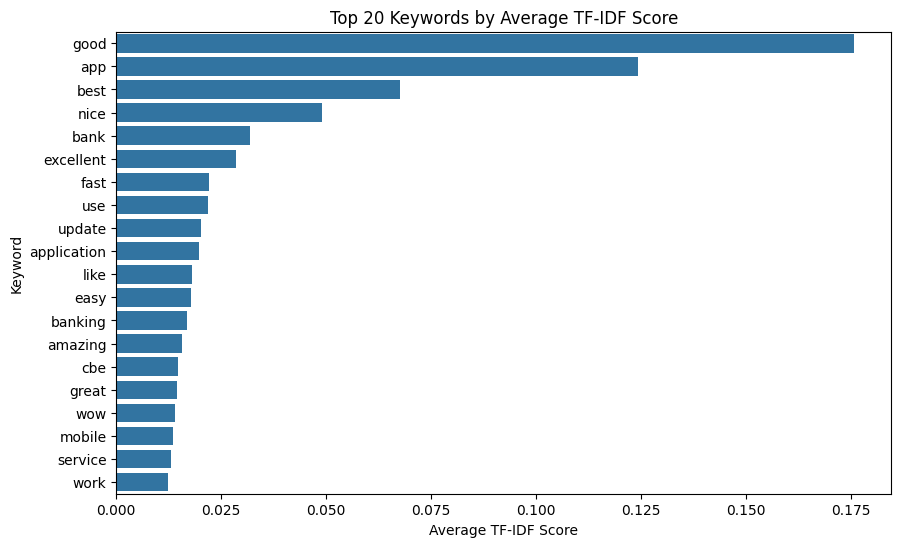

Assigning themes to reviews...
Themes assigned successfully


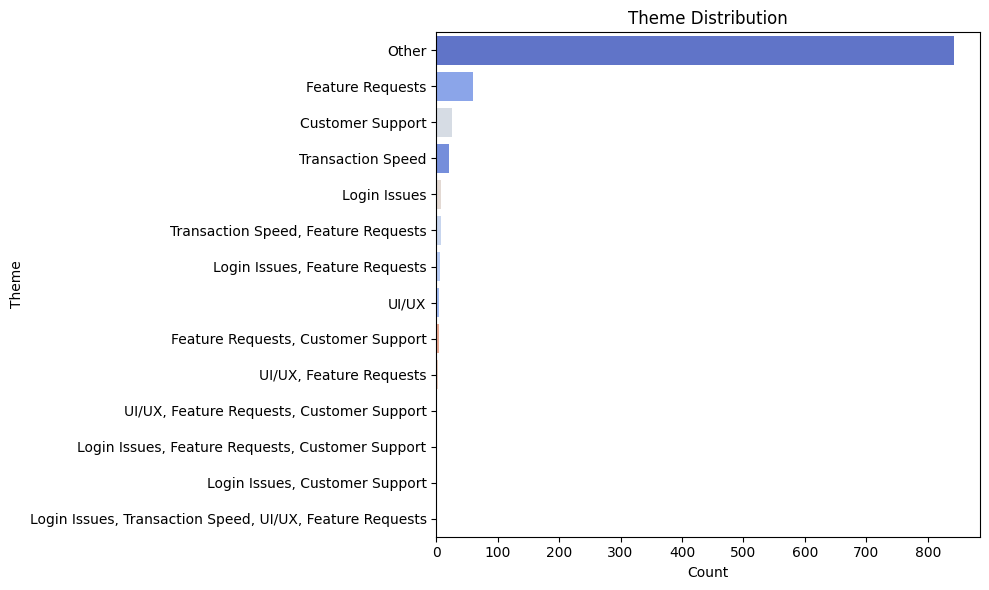

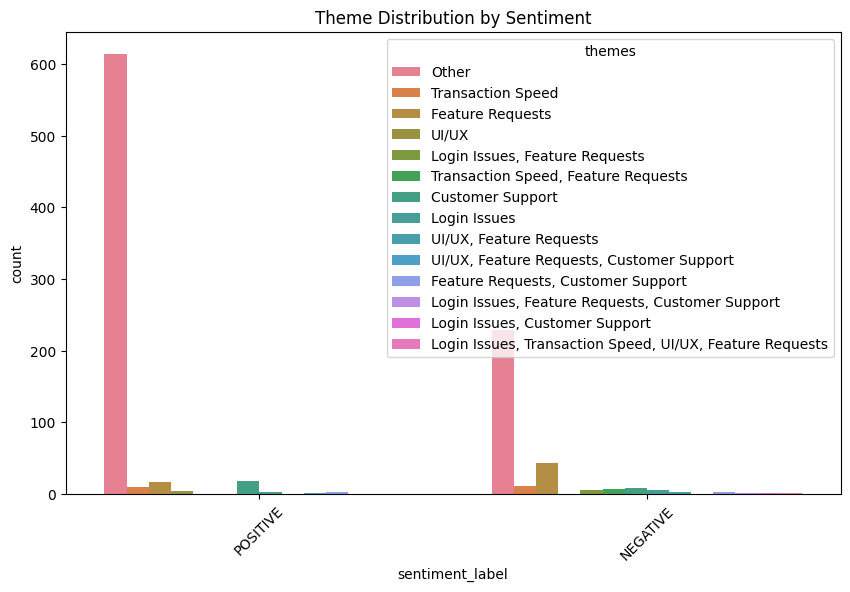

In [20]:
from pathlib import Path
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import importlib.util

# Locate project root and add src to sys.path
cwd = Path.cwd()
project_root = cwd.parent if cwd.name == "notebooks" else next((p for p in cwd.parents if (p / "src").exists()), cwd)
SRC_DIR = project_root / "src"
print(f"Project root: {project_root}")
print(f"Adding src to sys.path: {SRC_DIR}")
sys.path.insert(0, str(SRC_DIR))


spec = importlib.util.spec_from_file_location("theme_extractor", SRC_DIR / "theme_extractor.py")
theme_module = importlib.util.module_from_spec(spec)
spec.loader.exec_module(theme_module)
ThemeExtractor = theme_module.ThemeExtractor

extractor = ThemeExtractor()
df = extractor.load_data()
print(f"Loaded {len(df)} reviews")


# Compute TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=100)
tfidf_matrix = vectorizer.fit_transform(df['review_text'].astype(str))
keywords = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=keywords)

# Top 20 keywords by average TF-IDF score
avg_scores = tfidf_df.mean().sort_values(ascending=False).head(20)
plt.figure(figsize=(10,6))
sns.barplot(
    x=avg_scores.values,
    y=avg_scores.index,
    color='tab:blue'        # single-color bars
)
plt.title('Top 20 Keywords by Average TF-IDF Score')
plt.xlabel('Average TF-IDF Score')
plt.ylabel('Keyword')
plt.show()



# Assign themes
df = extractor.assign_themes(df)
# Overall theme distribution
plt.figure(figsize=(10,6))
sns.countplot(
    data=df,
    y='themes',
    hue='themes',  # Added to satisfy Seaborn >=0.14
    order=df['themes'].value_counts().index,
    palette='coolwarm',
    legend=False   # Hide redundant legend
)
plt.title('Theme Distribution')
plt.xlabel('Count')
plt.ylabel('Theme')
plt.tight_layout()
plt.show()


# Theme distribution by sentiment
plt.figure(figsize=(10,6))
sns.countplot(x='sentiment_label', hue='themes', data=df)
plt.title('Theme Distribution by Sentiment')
plt.xticks(rotation=45)
plt.show()
